In [567]:
import os
import requests
import pandas as pd
import io


BASE = "https://feeds.datagolf.com"

API_KEY = "a052bd0a30b60bf98a612c6e3598"

def _get(path, params=None, stream=False):
    params = dict(params or {})
    params["key"] = API_KEY
    r = requests.get(f"{BASE}{path}", params=params, stream=stream, timeout=30)
    r.raise_for_status()
    return r

def get_rounds(file_format="csv", tour="pga", year="2024", event_id="all"):
    path = "/historical-raw-data/rounds"
    params = {
        "file_format": file_format,
        "tour": tour,
        "year": year,
        "event_id": event_id,
    }
    if file_format == "csv":
        r = _get(path, params, stream=True)
        return pd.read_csv(io.StringIO(r.text))
    r = _get(path, params)
    return r.json()

def get_event_list(file_format="csv"):
    path = "/historical-raw-data/event-list"
    params = {"file_format": file_format}
    if file_format == "csv":
        r = _get(path, params, stream=True)
        return pd.read_csv(io.StringIO(r.text))
    r = _get(path, params)
    return r.json()

def get_schedule(file_format="csv"):
    path = "/get-schedule"
    params = {"tour": "all", "file_format": file_format}
    if file_format == "csv":
        r = _get(path, params, stream=True)
        return pd.read_csv(io.StringIO(r.text))
    r = _get(path, params)
    return r.json()
    

if __name__ == "__main__":
    rounds = get_rounds("csv", "pga")
    events = get_event_list("csv")
    schedule = get_schedule("csv")
    
    print(rounds)
    


      tour  year  season event_completed  \
0      pga  2024    2024      2024-01-07   
1      pga  2024    2024      2024-01-07   
2      pga  2024    2024      2024-01-07   
3      pga  2024    2024      2024-01-07   
4      pga  2024    2024      2024-01-07   
...    ...   ...     ...             ...   
18579  pga  2024    2024      2024-12-15   
18580  pga  2024    2024      2024-12-15   
18581  pga  2024    2024      2024-12-15   
18582  pga  2024    2024      2024-12-15   
18583  pga  2024    2024      2024-12-15   

                                      event_name  event_id  \
0                                     The Sentry        16   
1                                     The Sentry        16   
2                                     The Sentry        16   
3                                     The Sentry        16   
4                                     The Sentry        16   
...                                          ...       ...   
18579  PGA TOUR Q-School presented by

In [568]:
rounds.tour.unique()

array(['pga'], dtype=object)

In [569]:
events.head()

,tour,calendar_year,date,event_name,event_id,sg_categories,traditional_stats
0,pta,2025,2025-09-28,Fortinet Cup Championship,16,no,no
1,ngl,2025,2025-09-28,FootJoy Championship,11061,no,no
2,kor,2025,2025-09-28,Hyundai Insurance KJ Choi Invitational,11060,no,no
3,jpn,2025,2025-09-28,Panasonic Open Golf Championship,11059,no,no
4,chn,2025,2025-09-28,JINGPAI Wuhan Modern Land Beyond Sky Open,11057,no,no


In [570]:
events = events[(events['tour'] == 'pga') & (events['calendar_year'] == 2024)]

In [571]:
rounds.columns

Index(['tour', 'year', 'season', 'event_completed', 'event_name', 'event_id',
       'player_name', 'dg_id', 'fin_text', 'round_num', 'course_name',
       'course_num', 'course_par', 'start_hole', 'teetime', 'round_score',
       'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total',
       'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh',
       'prox_fw', 'great_shots', 'poor_shots', 'eagles_or_better', 'birdies',
       'pars', 'bogies', 'doubles_or_worse'],
      dtype='object')

In [572]:
merged_df = pd.merge(rounds, events, on='event_id', how='left')

In [573]:
cols_to_drop = [col for col in merged_df.columns if col.endswith('_y')]
merged_df.drop(columns=cols_to_drop, inplace=True)

In [574]:
merged_df.columns

Index(['tour_x', 'year', 'season', 'event_completed', 'event_name_x',
       'event_id', 'player_name', 'dg_id', 'fin_text', 'round_num',
       'course_name', 'course_num', 'course_par', 'start_hole', 'teetime',
       'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g',
       'sg_total', 'driving_dist', 'driving_acc', 'gir', 'scrambling',
       'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots', 'eagles_or_better',
       'birdies', 'pars', 'bogies', 'doubles_or_worse', 'calendar_year',
       'date', 'sg_categories', 'traditional_stats'],
      dtype='object')

In [575]:
merged_df.describe()

,year,season,event_id,dg_id,round_num,course_num,course_par,start_hole,round_score,sg_putt,...,prox_rgh,prox_fw,great_shots,poor_shots,eagles_or_better,birdies,pars,bogies,doubles_or_worse,calendar_year
count,18584.0,18584.0,18584.000000,1.858400e+04,18584.000000,18584.000000,18584.000000,18584.000000,18584.000000,15605.000000,...,14655.000000,15165.000000,15165.000000,15165.000000,18584.000000,18584.000000,18584.000000,18584.000000,18584.00000,18584.0
mean,2024.0,2024.0,215.500000,3.420768e+04,2.226754,630.070706,71.098149,4.092660,70.317531,0.000099,...,54.115545,31.479421,3.280317,3.777712,0.108965,3.810644,11.217391,2.530510,0.33249,2024.0
std,0.0,0.0,236.325328,4.031805e+05,1.081326,327.786926,0.802614,4.274386,3.322398,1.701977,...,27.968797,7.273955,1.721115,2.137882,0.326777,1.820330,2.067053,1.647037,0.60512,0.0
min,2024.0,2024.0,2.000000,4.400000e+01,1.000000,4.000000,70.000000,1.000000,59.000000,-7.304000,...,0.000000,12.038000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,2024.0
25%,2024.0,2024.0,16.000000,1.387200e+04,1.000000,503.000000,70.000000,1.000000,68.000000,-1.144000,...,35.760000,26.286000,2.000000,2.000000,0.000000,3.000000,10.000000,1.000000,0.00000,2024.0
50%,2024.0,2024.0,41.000000,1.757600e+04,2.000000,746.000000,71.000000,1.000000,70.000000,0.014000,...,48.665000,30.706000,3.000000,4.000000,0.000000,4.000000,11.000000,2.000000,0.00000,2024.0
75%,2024.0,2024.0,493.000000,2.301400e+04,3.000000,897.000000,72.000000,10.000000,72.000000,1.158000,...,66.128500,35.819000,4.000000,5.000000,0.000000,5.000000,13.000000,4.000000,1.00000,2024.0
max,2024.0,2024.0,554.000000,1.006600e+07,4.000000,978.000000,73.000000,10.000000,91.000000,7.152000,...,321.754000,71.083000,13.000000,16.000000,2.000000,12.000000,18.000000,11.000000,5.00000,2024.0


In [576]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tour_x             18584 non-null  object 
 1   year               18584 non-null  int64  
 2   season             18584 non-null  int64  
 3   event_completed    18584 non-null  object 
 4   event_name_x       18584 non-null  object 
 5   event_id           18584 non-null  int64  
 6   player_name        18584 non-null  object 
 7   dg_id              18584 non-null  int64  
 8   fin_text           18584 non-null  object 
 9   round_num          18584 non-null  int64  
 10  course_name        18584 non-null  object 
 11  course_num         18584 non-null  int64  
 12  course_par         18584 non-null  int64  
 13  start_hole         18584 non-null  int64  
 14  teetime            18584 non-null  object 
 15  round_score        18584 non-null  int64  
 16  sg_putt            156

In [577]:
merged_df = merged_df.rename(columns=lambda c: c.removesuffix("_x"))


In [578]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tour               18584 non-null  object 
 1   year               18584 non-null  int64  
 2   season             18584 non-null  int64  
 3   event_completed    18584 non-null  object 
 4   event_name         18584 non-null  object 
 5   event_id           18584 non-null  int64  
 6   player_name        18584 non-null  object 
 7   dg_id              18584 non-null  int64  
 8   fin_text           18584 non-null  object 
 9   round_num          18584 non-null  int64  
 10  course_name        18584 non-null  object 
 11  course_num         18584 non-null  int64  
 12  course_par         18584 non-null  int64  
 13  start_hole         18584 non-null  int64  
 14  teetime            18584 non-null  object 
 15  round_score        18584 non-null  int64  
 16  sg_putt            156

In [579]:
merged_df = merged_df[merged_df["tour"] == "pga"]

In [580]:
merged_df.head()

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,poor_shots,eagles_or_better,birdies,pars,bogies,doubles_or_worse,calendar_year,date,sg_categories,traditional_stats
0,pga,2024,2024,2024-01-07,The Sentry,16,"Echavarria, Nico",22833,T25,3,...,2.0,1,4,12,1,0,2024,2024-01-07,yes,yes
1,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,3,...,5.0,0,5,10,3,0,2024,2024-01-07,yes,yes
2,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,4,...,7.0,1,6,8,2,1,2024,2024-01-07,yes,yes
3,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,1,...,4.0,1,7,7,3,0,2024,2024-01-07,yes,yes
4,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,2,...,3.0,0,7,9,1,1,2024,2024-01-07,yes,yes


In [581]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tour               18584 non-null  object 
 1   year               18584 non-null  int64  
 2   season             18584 non-null  int64  
 3   event_completed    18584 non-null  object 
 4   event_name         18584 non-null  object 
 5   event_id           18584 non-null  int64  
 6   player_name        18584 non-null  object 
 7   dg_id              18584 non-null  int64  
 8   fin_text           18584 non-null  object 
 9   round_num          18584 non-null  int64  
 10  course_name        18584 non-null  object 
 11  course_num         18584 non-null  int64  
 12  course_par         18584 non-null  int64  
 13  start_hole         18584 non-null  int64  
 14  teetime            18584 non-null  object 
 15  round_score        18584 non-null  int64  
 16  sg_putt            156

In [582]:
events = events[events.tour == "pga"]

events.head()

,tour,calendar_year,date,event_name,event_id,sg_categories,traditional_stats
411,pga,2024,2024-12-15,PGA TOUR Q-School presented by Korn Ferry,88,no,basic
417,pga,2024,2024-12-08,Hero World Challenge,478,yes,yes
427,pga,2024,2024-11-24,The RSM Classic,493,yes,yes
434,pga,2024,2024-11-17,Butterfield Bermuda Championship,528,no,basic
443,pga,2024,2024-11-10,World Wide Technology Championship,457,no,basic


In [583]:
merged_df = pd.merge(merged_df, events[["calendar_year", "event_id", "sg_categories", "traditional_stats"]], left_on=['year', 'event_id'], right_on=['calendar_year', 'event_id'], how='left')

In [584]:
merged_df.head()

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,pars,bogies,doubles_or_worse,calendar_year_x,date,sg_categories_x,traditional_stats_x,calendar_year_y,sg_categories_y,traditional_stats_y
0,pga,2024,2024,2024-01-07,The Sentry,16,"Echavarria, Nico",22833,T25,3,...,12,1,0,2024,2024-01-07,yes,yes,2024,yes,yes
1,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,3,...,10,3,0,2024,2024-01-07,yes,yes,2024,yes,yes
2,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,4,...,8,2,1,2024,2024-01-07,yes,yes,2024,yes,yes
3,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,1,...,7,3,0,2024,2024-01-07,yes,yes,2024,yes,yes
4,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,2,...,9,1,1,2024,2024-01-07,yes,yes,2024,yes,yes


In [585]:
cols_to_drop = [col for col in merged_df.columns if col.endswith('_y')]
merged_df.drop(columns=cols_to_drop, inplace=True)

merged_df = merged_df.rename(columns=lambda c: c.removesuffix("_x"))

In [586]:
merged_df.head()

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,poor_shots,eagles_or_better,birdies,pars,bogies,doubles_or_worse,calendar_year,date,sg_categories,traditional_stats
0,pga,2024,2024,2024-01-07,The Sentry,16,"Echavarria, Nico",22833,T25,3,...,2.0,1,4,12,1,0,2024,2024-01-07,yes,yes
1,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,3,...,5.0,0,5,10,3,0,2024,2024-01-07,yes,yes
2,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,4,...,7.0,1,6,8,2,1,2024,2024-01-07,yes,yes
3,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,1,...,4.0,1,7,7,3,0,2024,2024-01-07,yes,yes
4,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,2,...,3.0,0,7,9,1,1,2024,2024-01-07,yes,yes


In [587]:
merged_df[(merged_df.sg_categories == "yes") & (merged_df.traditional_stats == "yes")]

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,poor_shots,eagles_or_better,birdies,pars,bogies,doubles_or_worse,calendar_year,date,sg_categories,traditional_stats
0,pga,2024,2024,2024-01-07,The Sentry,16,"Echavarria, Nico",22833,T25,3,...,2.0,1,4,12,1,0,2024,2024-01-07,yes,yes
1,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,3,...,5.0,0,5,10,3,0,2024,2024-01-07,yes,yes
2,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,4,...,7.0,1,6,8,2,1,2024,2024-01-07,yes,yes
3,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,1,...,4.0,1,7,7,3,0,2024,2024-01-07,yes,yes
4,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,2,...,3.0,0,7,9,1,1,2024,2024-01-07,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17926,pga,2024,2024,2024-12-08,Hero World Challenge,478,"Rai, Aaron",18554,T14,4,...,3.0,0,5,10,3,0,2024,2024-12-08,yes,yes
17927,pga,2024,2024,2024-12-08,Hero World Challenge,478,"Burns, Sam",19483,T14,1,...,5.0,0,6,10,2,0,2024,2024-12-08,yes,yes
17928,pga,2024,2024,2024-12-08,Hero World Challenge,478,"Young, Cameron",26651,13,3,...,7.0,0,4,11,2,1,2024,2024-12-08,yes,yes
17929,pga,2024,2024,2024-12-08,Hero World Challenge,478,"Burns, Sam",19483,T14,2,...,6.0,0,5,10,1,2,2024,2024-12-08,yes,yes


In [588]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tour               18584 non-null  object 
 1   year               18584 non-null  int64  
 2   season             18584 non-null  int64  
 3   event_completed    18584 non-null  object 
 4   event_name         18584 non-null  object 
 5   event_id           18584 non-null  int64  
 6   player_name        18584 non-null  object 
 7   dg_id              18584 non-null  int64  
 8   fin_text           18584 non-null  object 
 9   round_num          18584 non-null  int64  
 10  course_name        18584 non-null  object 
 11  course_num         18584 non-null  int64  
 12  course_par         18584 non-null  int64  
 13  start_hole         18584 non-null  int64  
 14  teetime            18584 non-null  object 
 15  round_score        18584 non-null  int64  
 16  sg_putt            156

In [589]:
merged_df.course_name.value_counts()

course_name
TPC San Antonio (Oaks Course)                     473
Royal Troon                                       470
TPC Deere Run                                     465
Valhalla Golf Club                                465
TPC Twin Cities                                   460
Pinehurst Resort & Country Club (Course No. 2)    460
Detroit Golf Club                                 458
The Renaissance Club                              457
Memorial Park Golf Course                         453
Innisbrook Resort (Copperhead Course)             453
Waialae Country Club                              451
Hamilton Golf & Country Club                      448
Keene Trace Golf Club (Champion Trace)            444
Sedgefield Country Club                           442
TPC Craig Ranch                                   441
Tahoe Mountain Club (Old Greenwood)               440
TPC Sawgrass (THE PLAYERS Stadium Course)         431
PGA National Resort (The Champion)                423
Silverado Resort

In [590]:
courses_df = pd.read_csv('cleaned_course_data.csv')

courses_df.head()

,par,yardage,yardage_4_5,yardage_3,adj_score_to_par,adj_par_3_score,adj_par_4_score,adj_par_5_score,adj_driving_distance,adj_sd_distance,...,adj_penalties,adj_ob,arg_fairway_sg,arg_rough_sg,arg_bunker_sg,less_5_ft_sg,greater_5_less_15_sg,greater_15_sg,course,country
0,72.0,7981.0,511.0,208.0,0.38,0.09,0.13,-0.33,323.2,19.3,...,0.69,0.14,0.003,-0.120,-0.017,0.005,-0.003,0.017,Castle Pines Golf Club,USA
1,72.0,7671.0,489.0,207.0,2.57,0.29,0.21,-0.17,293.0,17.9,...,0.65,0.08,-0.007,-0.040,-0.288,-0.007,-0.012,0.004,Ocean Course at Kiawah Island,USA
2,71.0,7635.0,490.0,194.0,2.57,0.18,0.20,-0.12,300.8,17.8,...,0.15,0.01,0.005,-0.034,-0.021,-0.005,-0.025,-0.019,Torrey Pines South (U.S. Open),USA
3,72.0,7599.0,488.0,190.0,1.11,0.12,0.17,-0.26,290.9,14.8,...,0.29,0.04,0.068,0.022,0.058,-0.015,-0.065,-0.011,Torrey Pines South (Genesis Inv.),USA
4,72.0,7589.0,487.0,194.0,1.18,0.10,0.17,-0.24,289.7,15.7,...,0.19,0.02,0.026,-0.011,-0.002,-0.013,-0.047,-0.008,Torrey Pines Golf Course (South Course),USA


In [591]:
merged_df['course_name'] = merged_df['course_name'].replace(to_replace="The Dunes Golf and Beach Club", value="Dunes Golf and Beach Club")

unique1 = set(merged_df['course_name'].unique())
unique2 = set(courses_df['course'].unique())

non_matches_1 = unique1 - unique2
non_matches_2 = unique2 - unique1

In [592]:
print("In df1 but not in df2:", non_matches_1)
print("In df2 but not in df1:", non_matches_2)

In df1 but not in df2: {'Tahoe Mountain Club (Old Greenwood)', 'La Quinta Country Club', "Dye's Valley Course", 'El Cardonal at Diamante', 'Sawgrass Country Club', 'Grand Reserve Golf Club', 'Torrey Pines Golf Course (North Course)', 'Nicklaus Tournament Course', 'Port Royal Golf Course', 'Sea Island Golf Club (Plantation Course)', 'Puntacana Resort & Club (Corales Golf Course)'}
In df2 but not in df1: {'RTJ Trail (Grand National)', 'Muirfield Village Golf Club (Workday)', 'Caves Valley Golf Club', 'Pebble Beach Golf Links (U.S. Open)', 'Olympia Fields Country Club (North Course)', "St. George's G&CC", 'Golf Club of Houston', 'Sherwood Country Club', 'Hurstbourne Country Club', 'Austin Country Club', 'Liberty National Golf Club', 'The Los Angeles Country Club (North Course)', 'TPC Toronto at Osprey Valley (North Course)', 'Aronimink GC', 'Winged Foot GC', 'Eagle Point Golf Club', 'PGA National Resort (The Champion - Par 71)', 'TPC Louisiana', 'Bethpage Black', 'Oakdale Golf & Country C

In [593]:
courses_df[courses_df['course'].str.contains("Torrey Pines", case=False, na=False)]

,par,yardage,yardage_4_5,yardage_3,adj_score_to_par,adj_par_3_score,adj_par_4_score,adj_par_5_score,adj_driving_distance,adj_sd_distance,...,adj_penalties,adj_ob,arg_fairway_sg,arg_rough_sg,arg_bunker_sg,less_5_ft_sg,greater_5_less_15_sg,greater_15_sg,course,country
2,71.0,7635.0,490.0,194.0,2.57,0.18,0.20,-0.12,300.8,17.8,...,0.15,0.01,0.005,-0.034,-0.021,-0.005,-0.025,-0.019,Torrey Pines South (U.S. Open),USA
3,72.0,7599.0,488.0,190.0,1.11,0.12,0.17,-0.26,290.9,14.8,...,0.29,0.04,0.068,0.022,0.058,-0.015,-0.065,-0.011,Torrey Pines South (Genesis Inv.),USA
4,72.0,7589.0,487.0,194.0,1.18,0.10,0.17,-0.24,289.7,15.7,...,0.19,0.02,0.026,-0.011,-0.002,-0.013,-0.047,-0.008,Torrey Pines Golf Course (South Course),USA


In [594]:
merged_df2 = merged_df.merge(courses_df, how='left', left_on='course_name', right_on='course')

In [595]:
merged_df2.to_csv("rounds_before_course_elim.csv", index=False)

In [596]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19145 entries, 0 to 19144
Data columns (total 72 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tour                  19145 non-null  object 
 1   year                  19145 non-null  int64  
 2   season                19145 non-null  int64  
 3   event_completed       19145 non-null  object 
 4   event_name            19145 non-null  object 
 5   event_id              19145 non-null  int64  
 6   player_name           19145 non-null  object 
 7   dg_id                 19145 non-null  int64  
 8   fin_text              19145 non-null  object 
 9   round_num             19145 non-null  int64  
 10  course_name           19145 non-null  object 
 11  course_num            19145 non-null  int64  
 12  course_par            19145 non-null  int64  
 13  start_hole            19145 non-null  int64  
 14  teetime               19145 non-null  object 
 15  round_score        

In [597]:
merged_df2.dropna(subset=['course'], inplace=True)

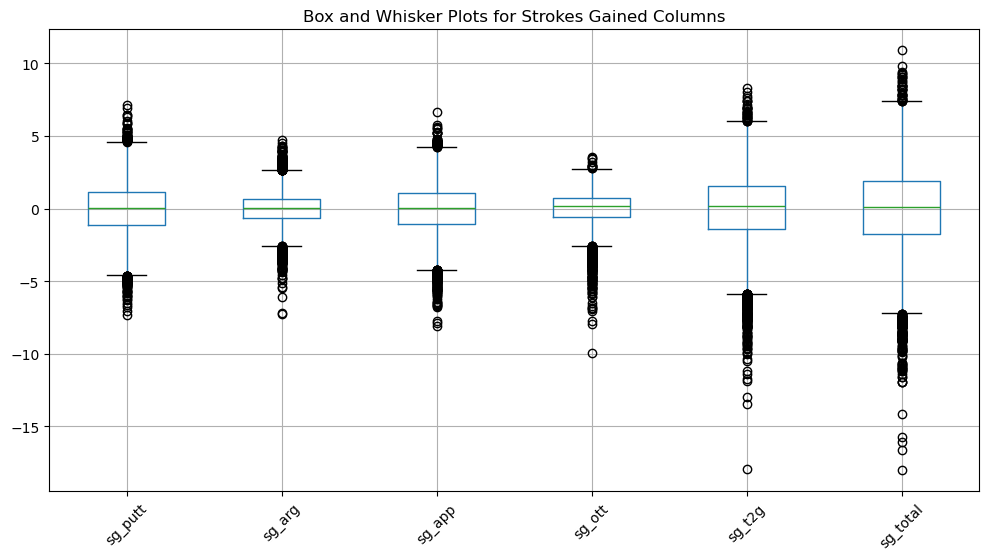

In [598]:
import matplotlib.pyplot as plt
sg_cols = [col for col in merged_df2.columns if col.startswith('sg_')]

merged_df2[sg_cols].boxplot(figsize=(12,6))
plt.xticks(rotation=45)  # rotate labels for readability
plt.title("Box and Whisker Plots for Strokes Gained Columns")
plt.show()

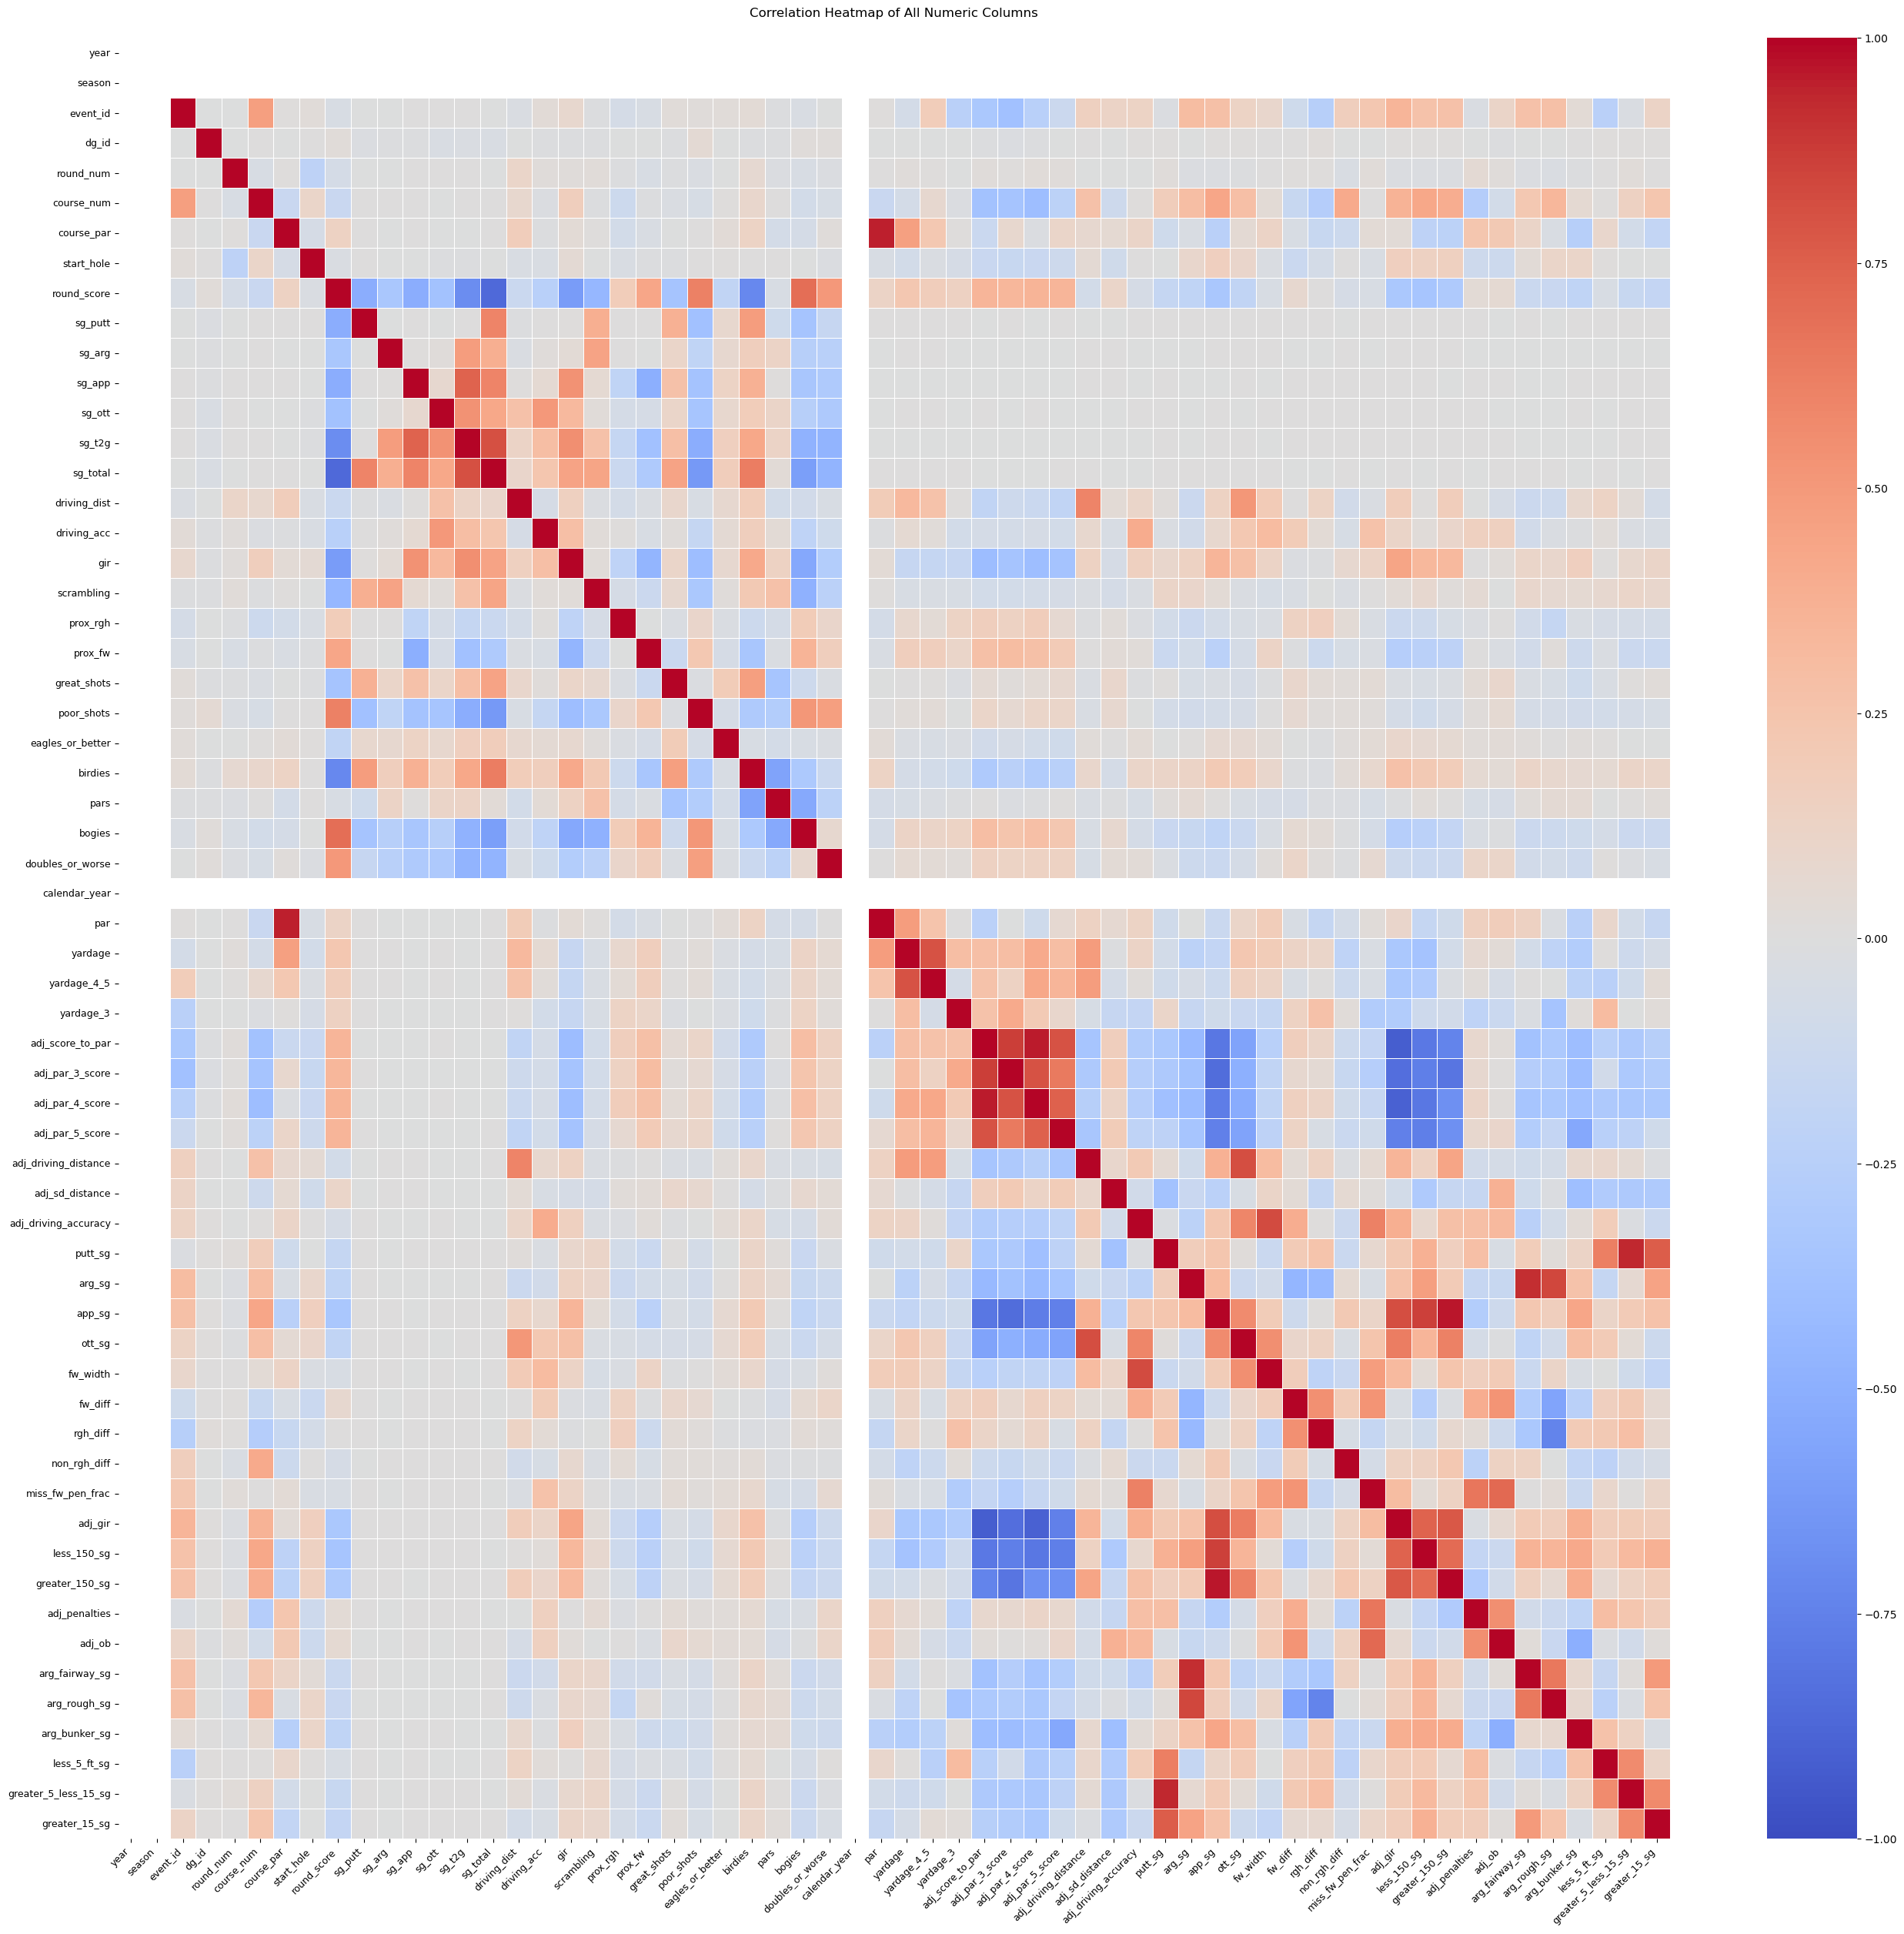

In [599]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr = merged_df2.corr(numeric_only=True)

# Dynamically scale figure size to number of columns
n = len(corr.columns)
plt.figure(figsize=(max(10, n * 0.6), max(8, n * 0.6)))

ax = sns.heatmap(
    corr,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    annot=False
)

# Force matplotlib to render all tick labels fully
ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=9)
ax.set_yticks(np.arange(len(corr.index)) + 0.5)
ax.set_yticklabels(corr.index, rotation=0, fontsize=9)

# Expand plot area and disable clipping
plt.subplots_adjust(bottom=0.3, left=0.25, right=0.95, top=0.95)
plt.title("Correlation Heatmap of All Numeric Columns", pad=20)
plt.show()

In [600]:
merged_df2.head()

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,adj_penalties,adj_ob,arg_fairway_sg,arg_rough_sg,arg_bunker_sg,less_5_ft_sg,greater_5_less_15_sg,greater_15_sg,course,country
0,pga,2024,2024,2024-01-07,The Sentry,16,"Echavarria, Nico",22833,T25,3,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA
1,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,3,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA
2,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,4,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA
3,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,1,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA
4,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,2,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA


In [601]:
merged_df2.player_name.nunique()

661

In [602]:
merged_df2[['player_name', 'year', 'course']].drop_duplicates().shape[0]

5164

In [603]:
merged_df2[merged_df2['player_name'] == 'DeChambeau, Bryson']

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,adj_penalties,adj_ob,arg_fairway_sg,arg_rough_sg,arg_bunker_sg,less_5_ft_sg,greater_5_less_15_sg,greater_15_sg,course,country
5881,pga,2024,2024,2024-04-14,Masters Tournament,14,"DeChambeau, Bryson",19841,T6,3,...,0.54,0.04,-0.104,-0.022000,-0.021,-0.004,-0.025,-0.056,Augusta National Golf Club,USA
5883,pga,2024,2024,2024-04-14,Masters Tournament,14,"DeChambeau, Bryson",19841,T6,4,...,0.54,0.04,-0.104,-0.022000,-0.021,-0.004,-0.025,-0.056,Augusta National Golf Club,USA
5895,pga,2024,2024,2024-04-14,Masters Tournament,14,"DeChambeau, Bryson",19841,T6,2,...,0.54,0.04,-0.104,-0.022000,-0.021,-0.004,-0.025,-0.056,Augusta National Golf Club,USA
5924,pga,2024,2024,2024-04-14,Masters Tournament,14,"DeChambeau, Bryson",19841,T6,1,...,0.54,0.04,-0.104,-0.022000,-0.021,-0.004,-0.025,-0.056,Augusta National Golf Club,USA
8622,pga,2024,2024,2024-05-19,PGA Championship,33,"DeChambeau, Bryson",19841,2,4,...,0.39,0.02,-0.007,-0.022000,0.009,-0.002,-0.002,0.013,Valhalla Golf Club,USA
8623,pga,2024,2024,2024-05-19,PGA Championship,33,"DeChambeau, Bryson",19841,2,3,...,0.39,0.02,-0.007,-0.022000,0.009,-0.002,-0.002,0.013,Valhalla Golf Club,USA
8624,pga,2024,2024,2024-05-19,PGA Championship,33,"DeChambeau, Bryson",19841,2,2,...,0.39,0.02,-0.007,-0.022000,0.009,-0.002,-0.002,0.013,Valhalla Golf Club,USA
8625,pga,2024,2024,2024-05-19,PGA Championship,33,"DeChambeau, Bryson",19841,2,1,...,0.39,0.02,-0.007,-0.022000,0.009,-0.002,-0.002,0.013,Valhalla Golf Club,USA
10112,pga,2024,2024,2024-06-16,U.S. Open,26,"DeChambeau, Bryson",19841,1,1,...,0.03,0.01,-0.112,-0.076648,-0.042,0.001,-0.011,-0.014,Pinehurst Resort & Country Club (Course No. 2),USA
10113,pga,2024,2024,2024-06-16,U.S. Open,26,"DeChambeau, Bryson",19841,1,2,...,0.03,0.01,-0.112,-0.076648,-0.042,0.001,-0.011,-0.014,Pinehurst Resort & Country Club (Course No. 2),USA


In [604]:
dropped_cols = ['course_par', 'sg_t2g', 'sg_total', 'adj_score_to_par', 'yardage', 'app_sg', 'putt_sg', 'arg_sg', 'great_shots', 'poor_shots']

merged_df2.drop(columns=dropped_cols, inplace=True)

In [605]:
merged_df2.head()

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,adj_penalties,adj_ob,arg_fairway_sg,arg_rough_sg,arg_bunker_sg,less_5_ft_sg,greater_5_less_15_sg,greater_15_sg,course,country
0,pga,2024,2024,2024-01-07,The Sentry,16,"Echavarria, Nico",22833,T25,3,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA
1,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,3,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA
2,pga,2024,2024,2024-01-07,The Sentry,16,"Finau, Tony",11676,T38,4,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA
3,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,1,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA
4,pga,2024,2024,2024-01-07,The Sentry,16,"Hoge, Tom",15575,T38,2,...,0.39,0.08,0.003,0.025,0.01,0.001,-0.005,-0.012,Plantation Course at Kapalua,USA


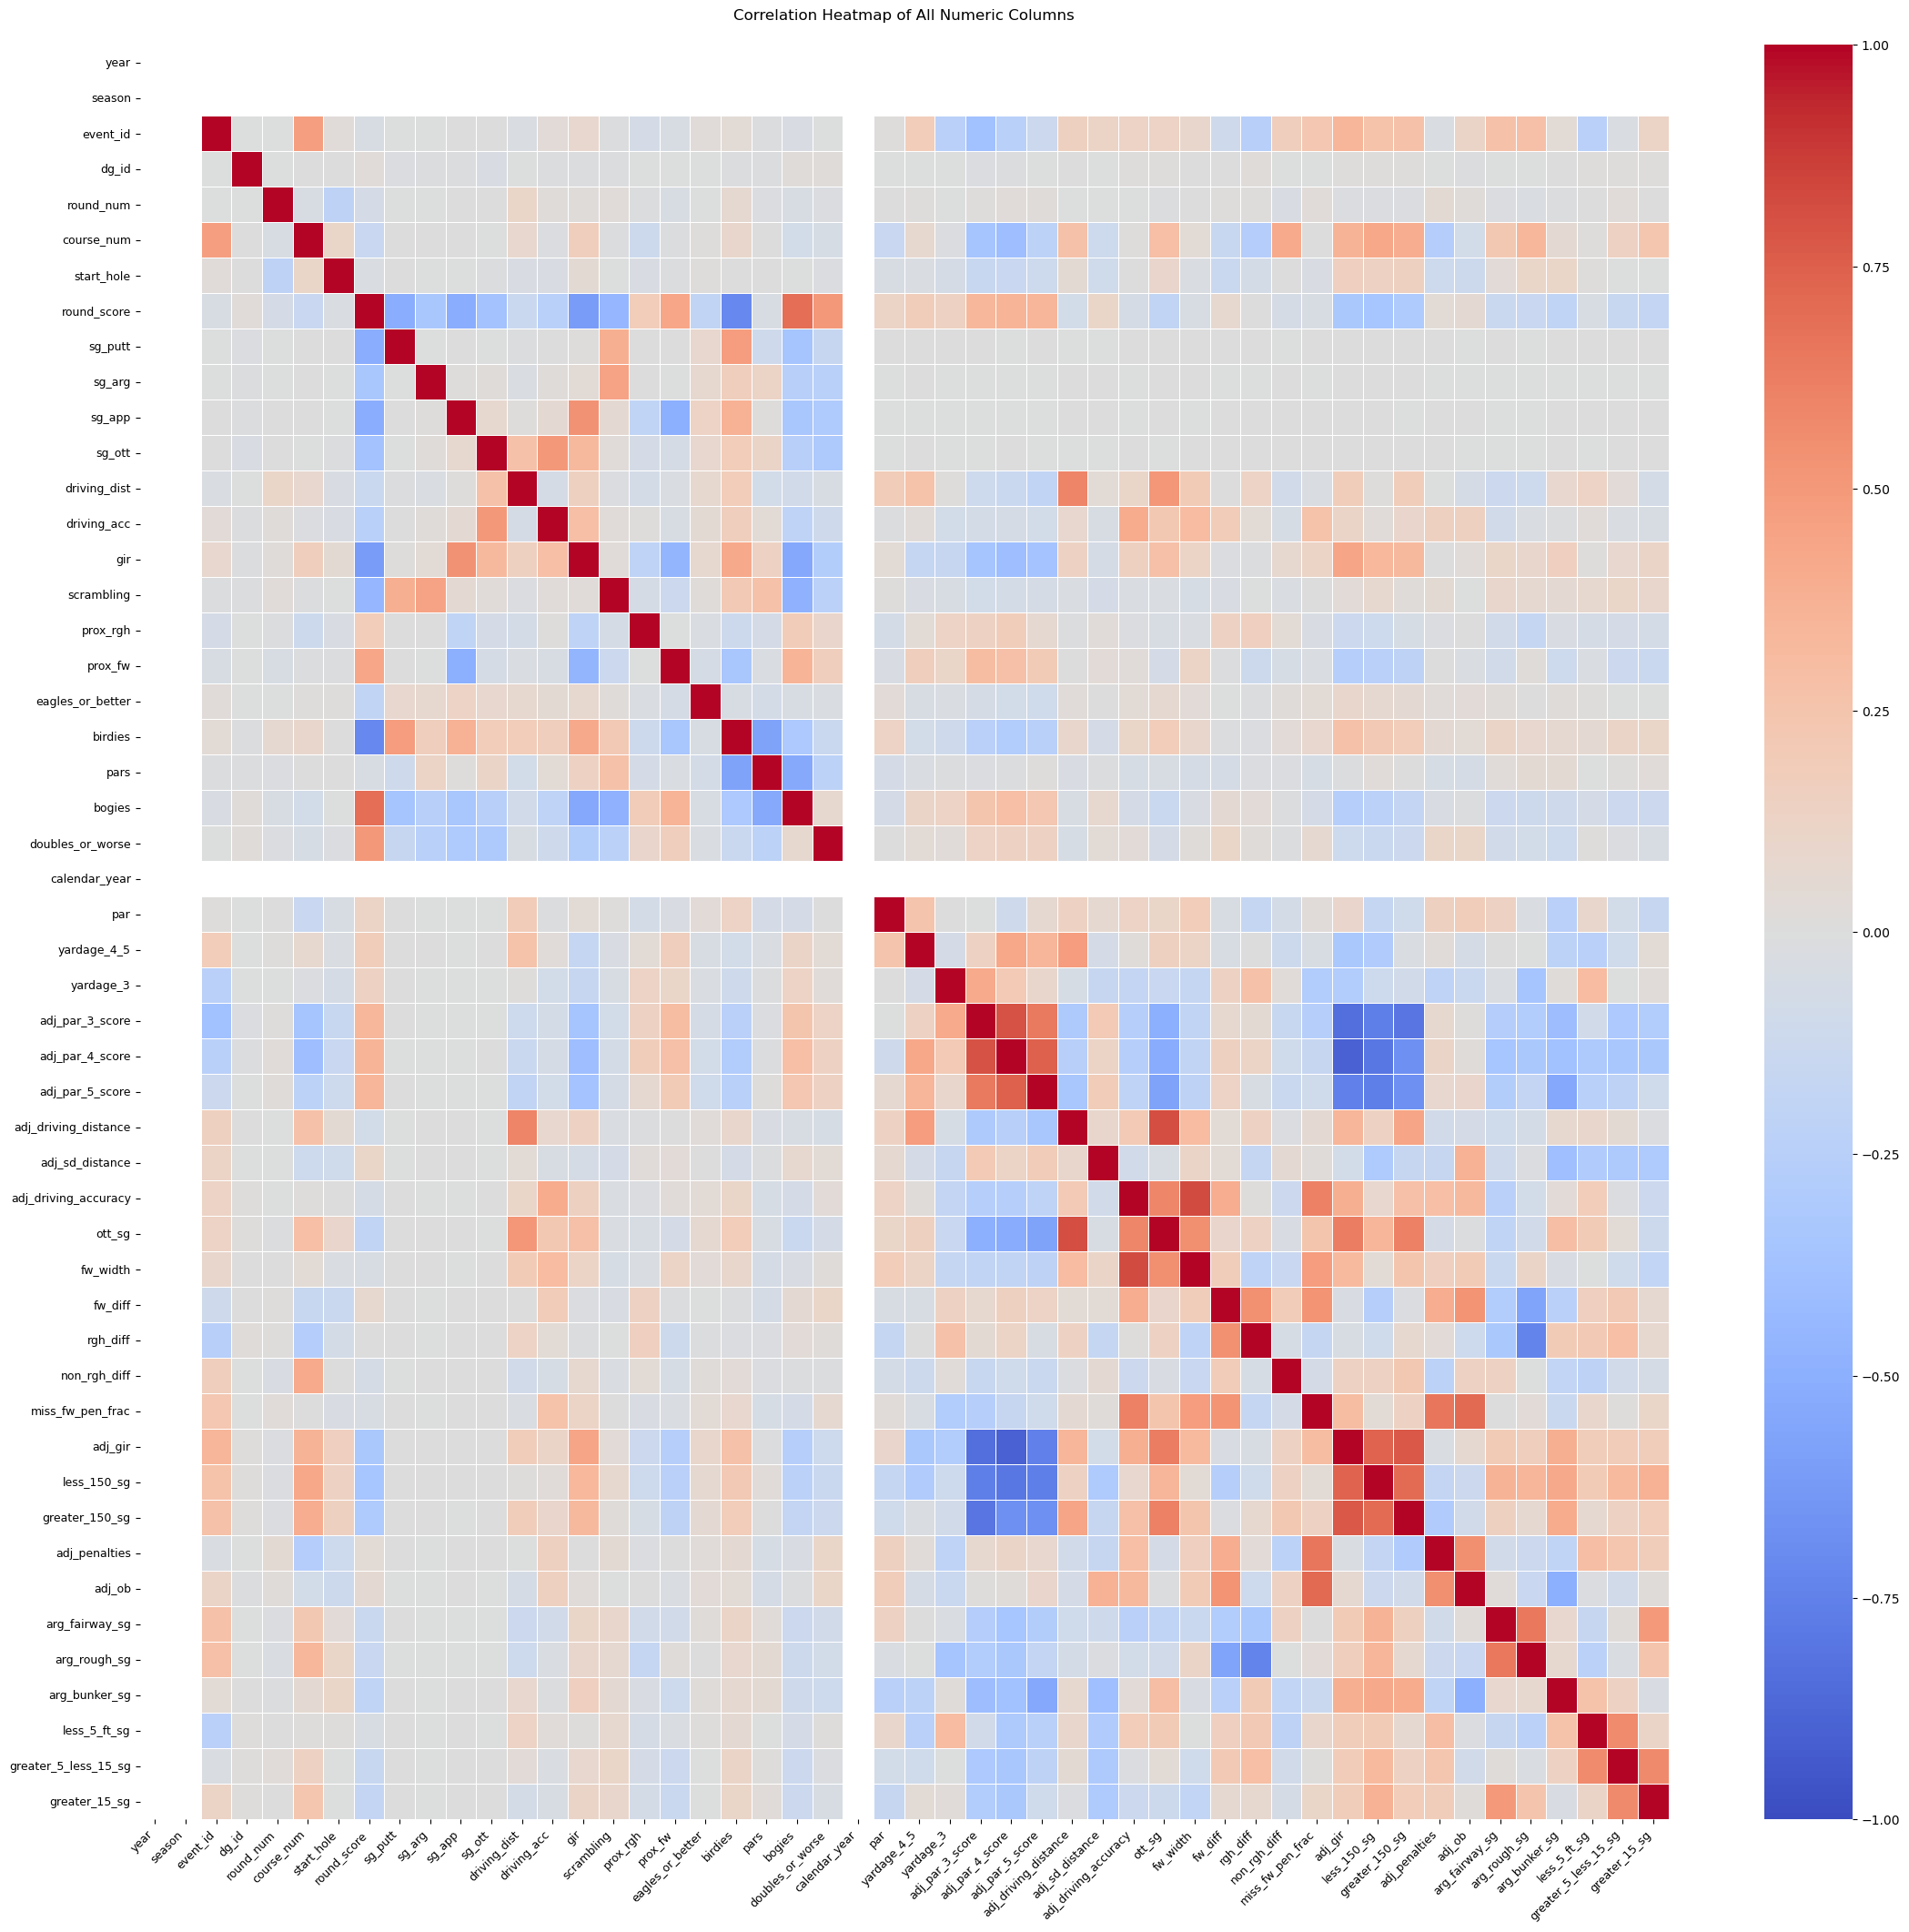

In [606]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr = merged_df2.corr(numeric_only=True)

# Dynamically scale figure size to number of columns
n = len(corr.columns)
plt.figure(figsize=(max(10, n * 0.6), max(8, n * 0.6)))

ax = sns.heatmap(
    corr,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    annot=False
)

# Force matplotlib to render all tick labels fully
ax.set_xticks(np.arange(len(corr.columns)) + 0.5)
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=9)
ax.set_yticks(np.arange(len(corr.index)) + 0.5)
ax.set_yticklabels(corr.index, rotation=0, fontsize=9)

# Expand plot area and disable clipping
plt.subplots_adjust(bottom=0.3, left=0.25, right=0.95, top=0.95)
plt.title("Correlation Heatmap of All Numeric Columns", pad=20)
plt.show()

In [607]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15858 entries, 0 to 18491
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tour                  15858 non-null  object 
 1   year                  15858 non-null  int64  
 2   season                15858 non-null  int64  
 3   event_completed       15858 non-null  object 
 4   event_name            15858 non-null  object 
 5   event_id              15858 non-null  int64  
 6   player_name           15858 non-null  object 
 7   dg_id                 15858 non-null  int64  
 8   fin_text              15858 non-null  object 
 9   round_num             15858 non-null  int64  
 10  course_name           15858 non-null  object 
 11  course_num            15858 non-null  int64  
 12  start_hole            15858 non-null  int64  
 13  teetime               15858 non-null  object 
 14  round_score           15858 non-null  int64  
 15  sg_putt               15

In [608]:
merged_df2.to_csv("rounds_after_course_elim.csv", index=False)

In [609]:
merged_df2.info()

merged_df2 = merged_df2.dropna(subset=['sg_putt'])

<class 'pandas.core.frame.DataFrame'>
Index: 15858 entries, 0 to 18491
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tour                  15858 non-null  object 
 1   year                  15858 non-null  int64  
 2   season                15858 non-null  int64  
 3   event_completed       15858 non-null  object 
 4   event_name            15858 non-null  object 
 5   event_id              15858 non-null  int64  
 6   player_name           15858 non-null  object 
 7   dg_id                 15858 non-null  int64  
 8   fin_text              15858 non-null  object 
 9   round_num             15858 non-null  int64  
 10  course_name           15858 non-null  object 
 11  course_num            15858 non-null  int64  
 12  start_hole            15858 non-null  int64  
 13  teetime               15858 non-null  object 
 14  round_score           15858 non-null  int64  
 15  sg_putt               15

In [610]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15726 entries, 0 to 18491
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tour                  15726 non-null  object 
 1   year                  15726 non-null  int64  
 2   season                15726 non-null  int64  
 3   event_completed       15726 non-null  object 
 4   event_name            15726 non-null  object 
 5   event_id              15726 non-null  int64  
 6   player_name           15726 non-null  object 
 7   dg_id                 15726 non-null  int64  
 8   fin_text              15726 non-null  object 
 9   round_num             15726 non-null  int64  
 10  course_name           15726 non-null  object 
 11  course_num            15726 non-null  int64  
 12  start_hole            15726 non-null  int64  
 13  teetime               15726 non-null  object 
 14  round_score           15726 non-null  int64  
 15  sg_putt               15